In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# run_y24-m04-d26_h01-m02_jItiT <- interessante (ho aumentato i punti della trajectory)
# run_y24-m04-d26_h01-m28_UwCND <- average sugli output del pid
# run_y24-m04-d26_h01-m34_aSrqW <- senza average su vel
# run_y24-m04-d26_h01-m38_kyoiP <- n 10, a .9
# run_y24-m04-d26_h01-m47_qgdcZ
csv_file = "run_y24-m04-d17_h02-m40_XQnMU"
csv_file += ".csv"
path = os.path.join(os.getcwd(), "data", csv_file)

df = pd.read_csv(path)
df.columns

Index(['index', 'run_name', 'x', 'y', 'z', 'roll', 'pitch', 'yaw', 'gate_x',
       'gate_y', 'gate_z', 'gate_yaw', 'vx_global', 'vy_global', 'vz_global',
       'vx_local', 'vy_local', 'roll_rate', 'pitch_rate', 'yaw_rate',
       'vx_local_sp', 'vy_local_sp', 'alt_sp', 'yaw_rate_sp', 'alt_command',
       'roll_command', 'pitch_command', 'yaw_command', 'camera_img',
       'depth_img', 'pencil_img'],
      dtype='object')

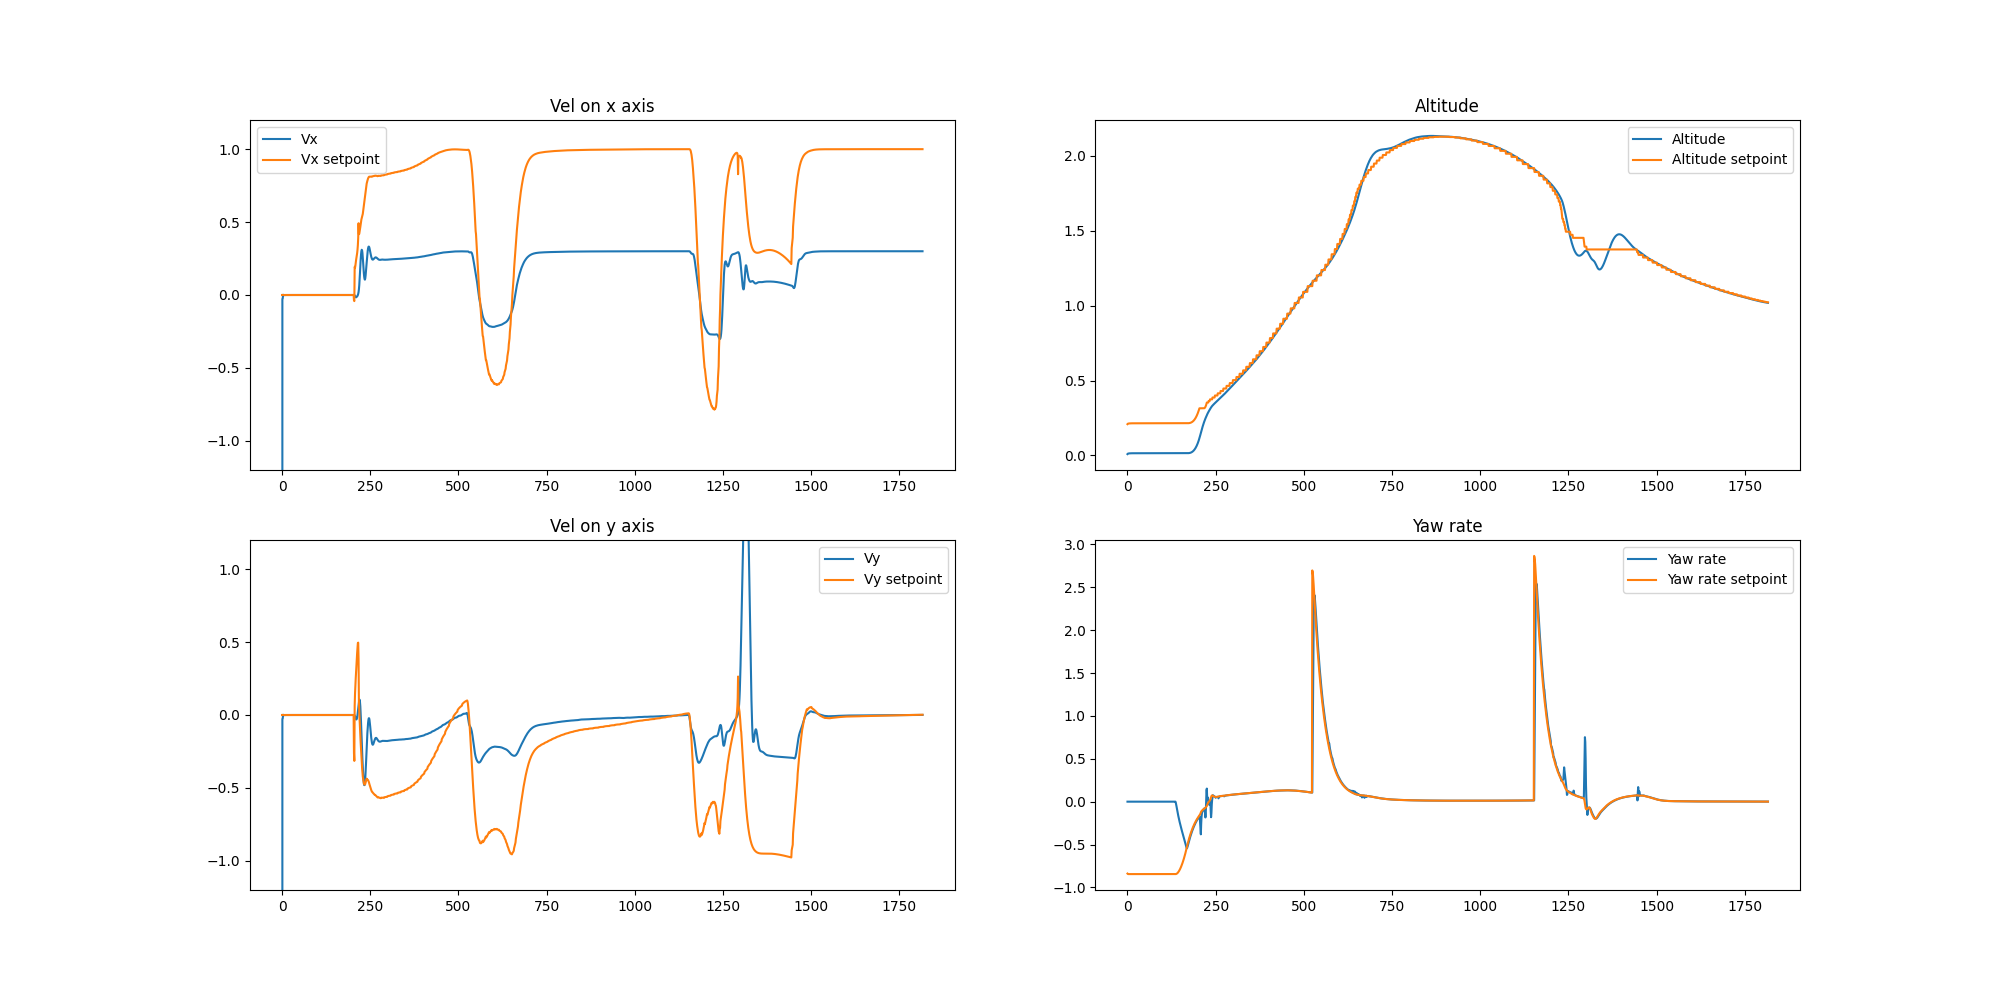

In [3]:
# %matplotlib notebook

plt.rcParams['figure.figsize'] = 20,10
fig, axs = plt.subplots(2, 2)


axs[0,0].plot(df['vx_local'], label='Vx')
axs[0,0].plot(df['vx_local_sp'], label='Vx setpoint')
axs[0,0].set_ylim((-1.2,1.2))
axs[0,0].set_title("Vel on x axis")
axs[0,0].legend()

axs[1,0].plot(df['vy_local'], label='Vy')
axs[1,0].plot(df['vy_local_sp'], label='Vy setpoint')
axs[1,0].set_ylim((-1.2, 1.2))
axs[1,0].set_title("Vel on y axis")
axs[1,0].legend()


axs[0,1].plot(df['z'], label='Altitude')
axs[0,1].plot(df['alt_sp'], label='Altitude setpoint')
axs[0,1].set_title("Altitude")
axs[0,1].legend()

axs[1,1].plot(df["yaw_rate"], label='Yaw rate')
axs[1,1].plot(df["yaw_rate_sp"], label='Yaw rate setpoint')
axs[1,1].set_title("Yaw rate")
axs[1,1].legend()

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


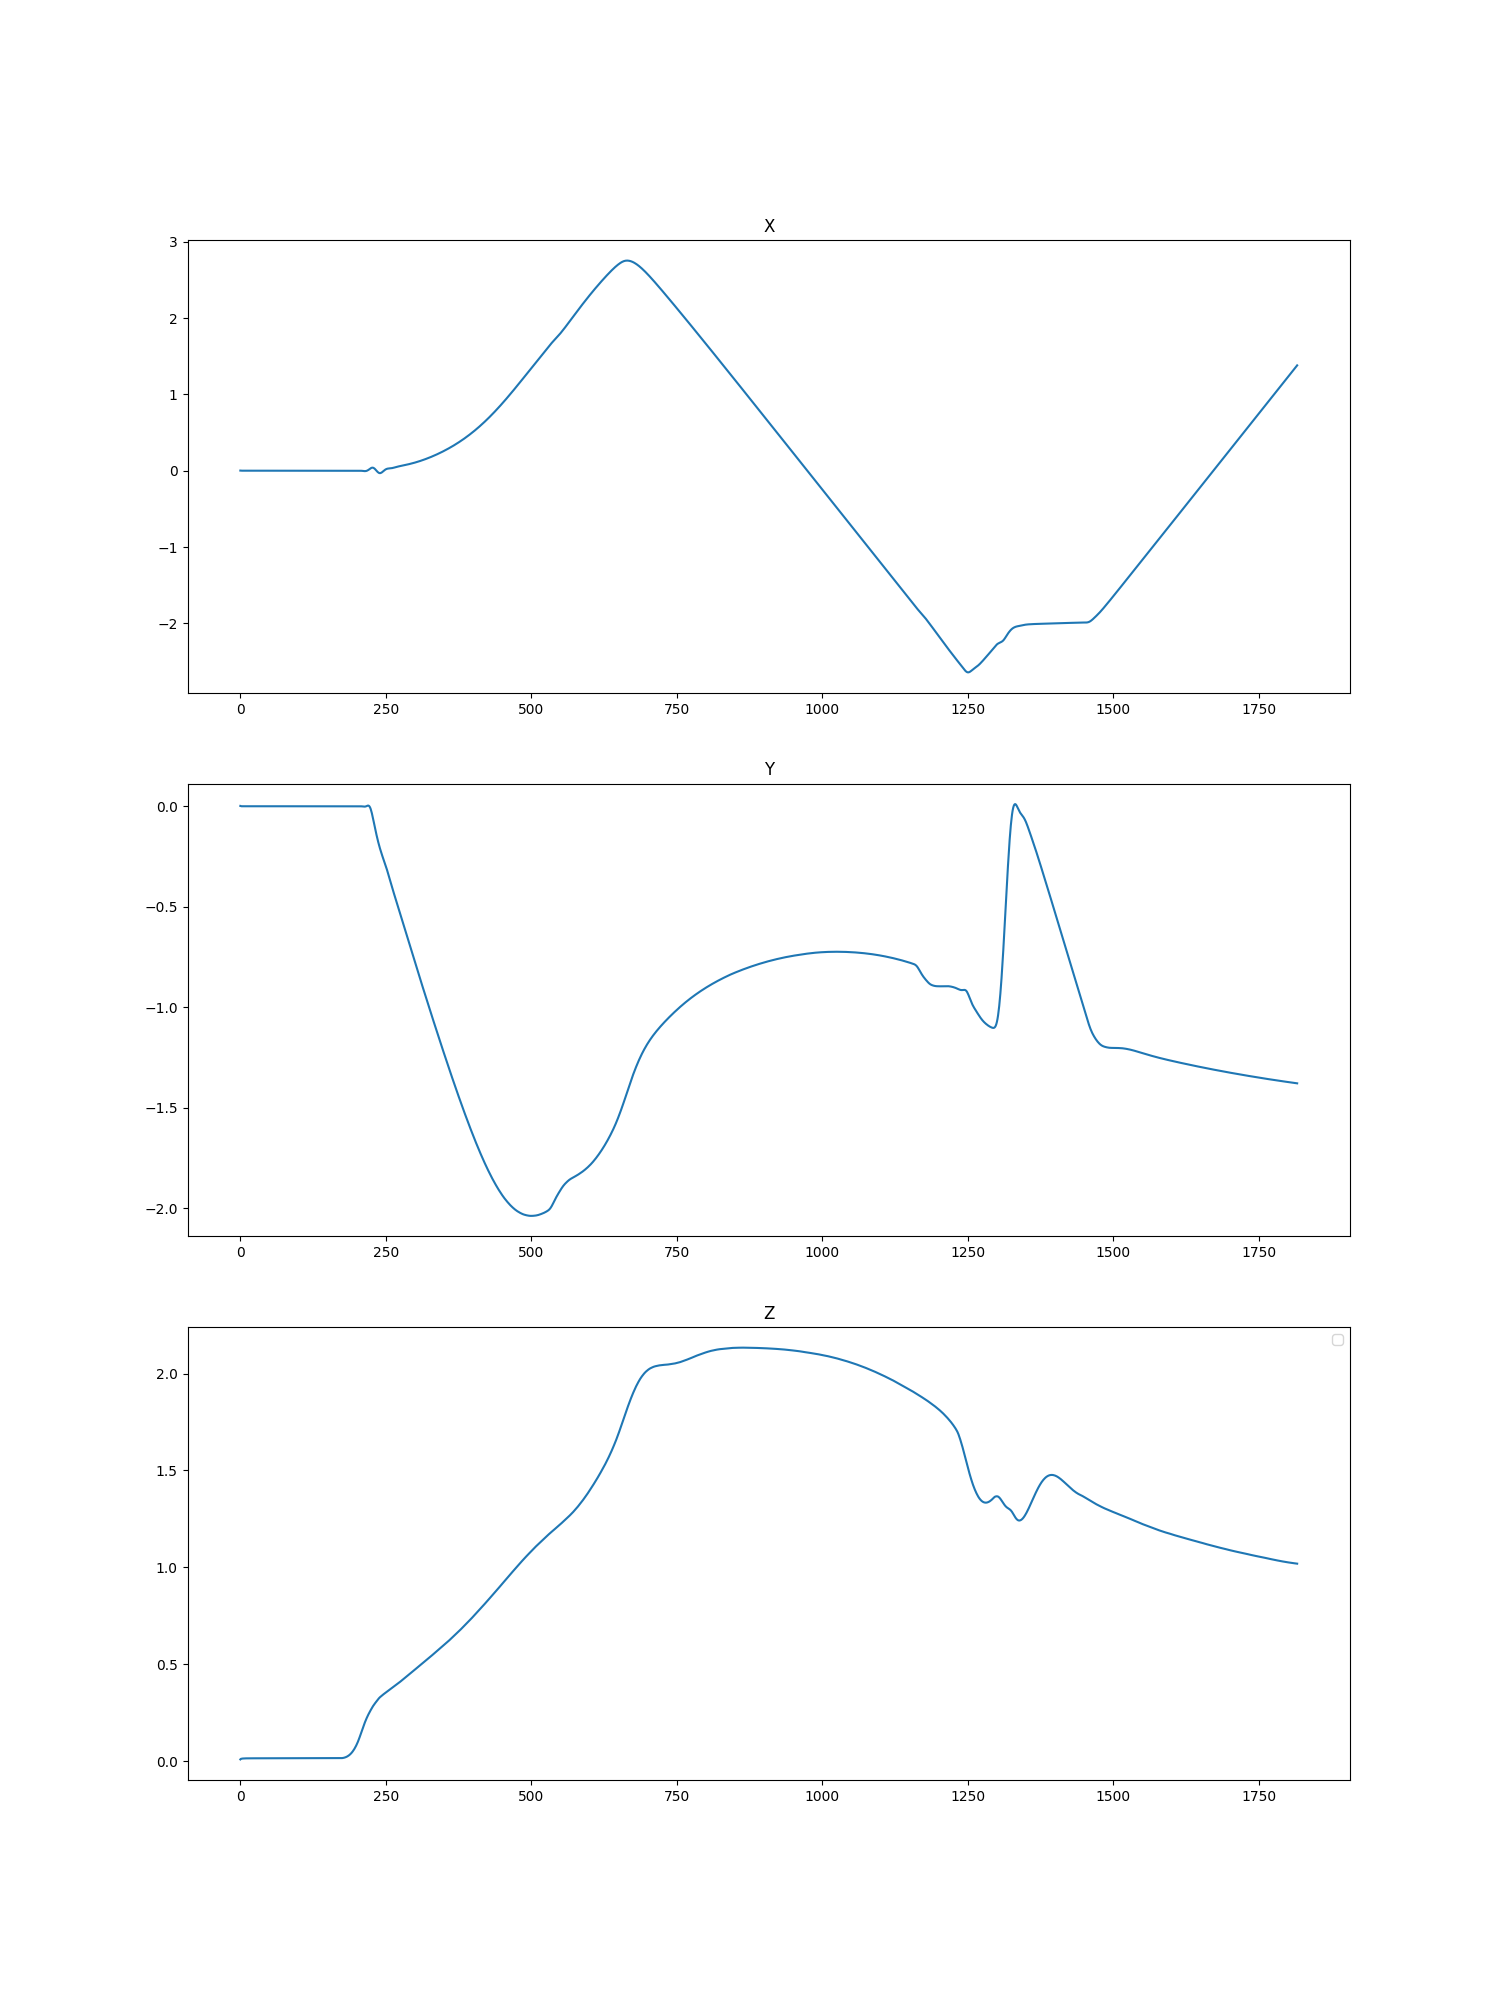

In [4]:
plt.rcParams['figure.figsize'] = 15,20
fig, axs = plt.subplots(3)

axs[0].plot(df['x'])
# axs[0].plot(df['x_sp'])
axs[0].set_title("X")

axs[1].plot(df['y'])
# axs[1].plot(df['y_sp'])
axs[1].set_title("Y")

axs[2].plot(df['z'])
# axs[2].plot(df['z_sp'])
axs[2].set_title("Z")



plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


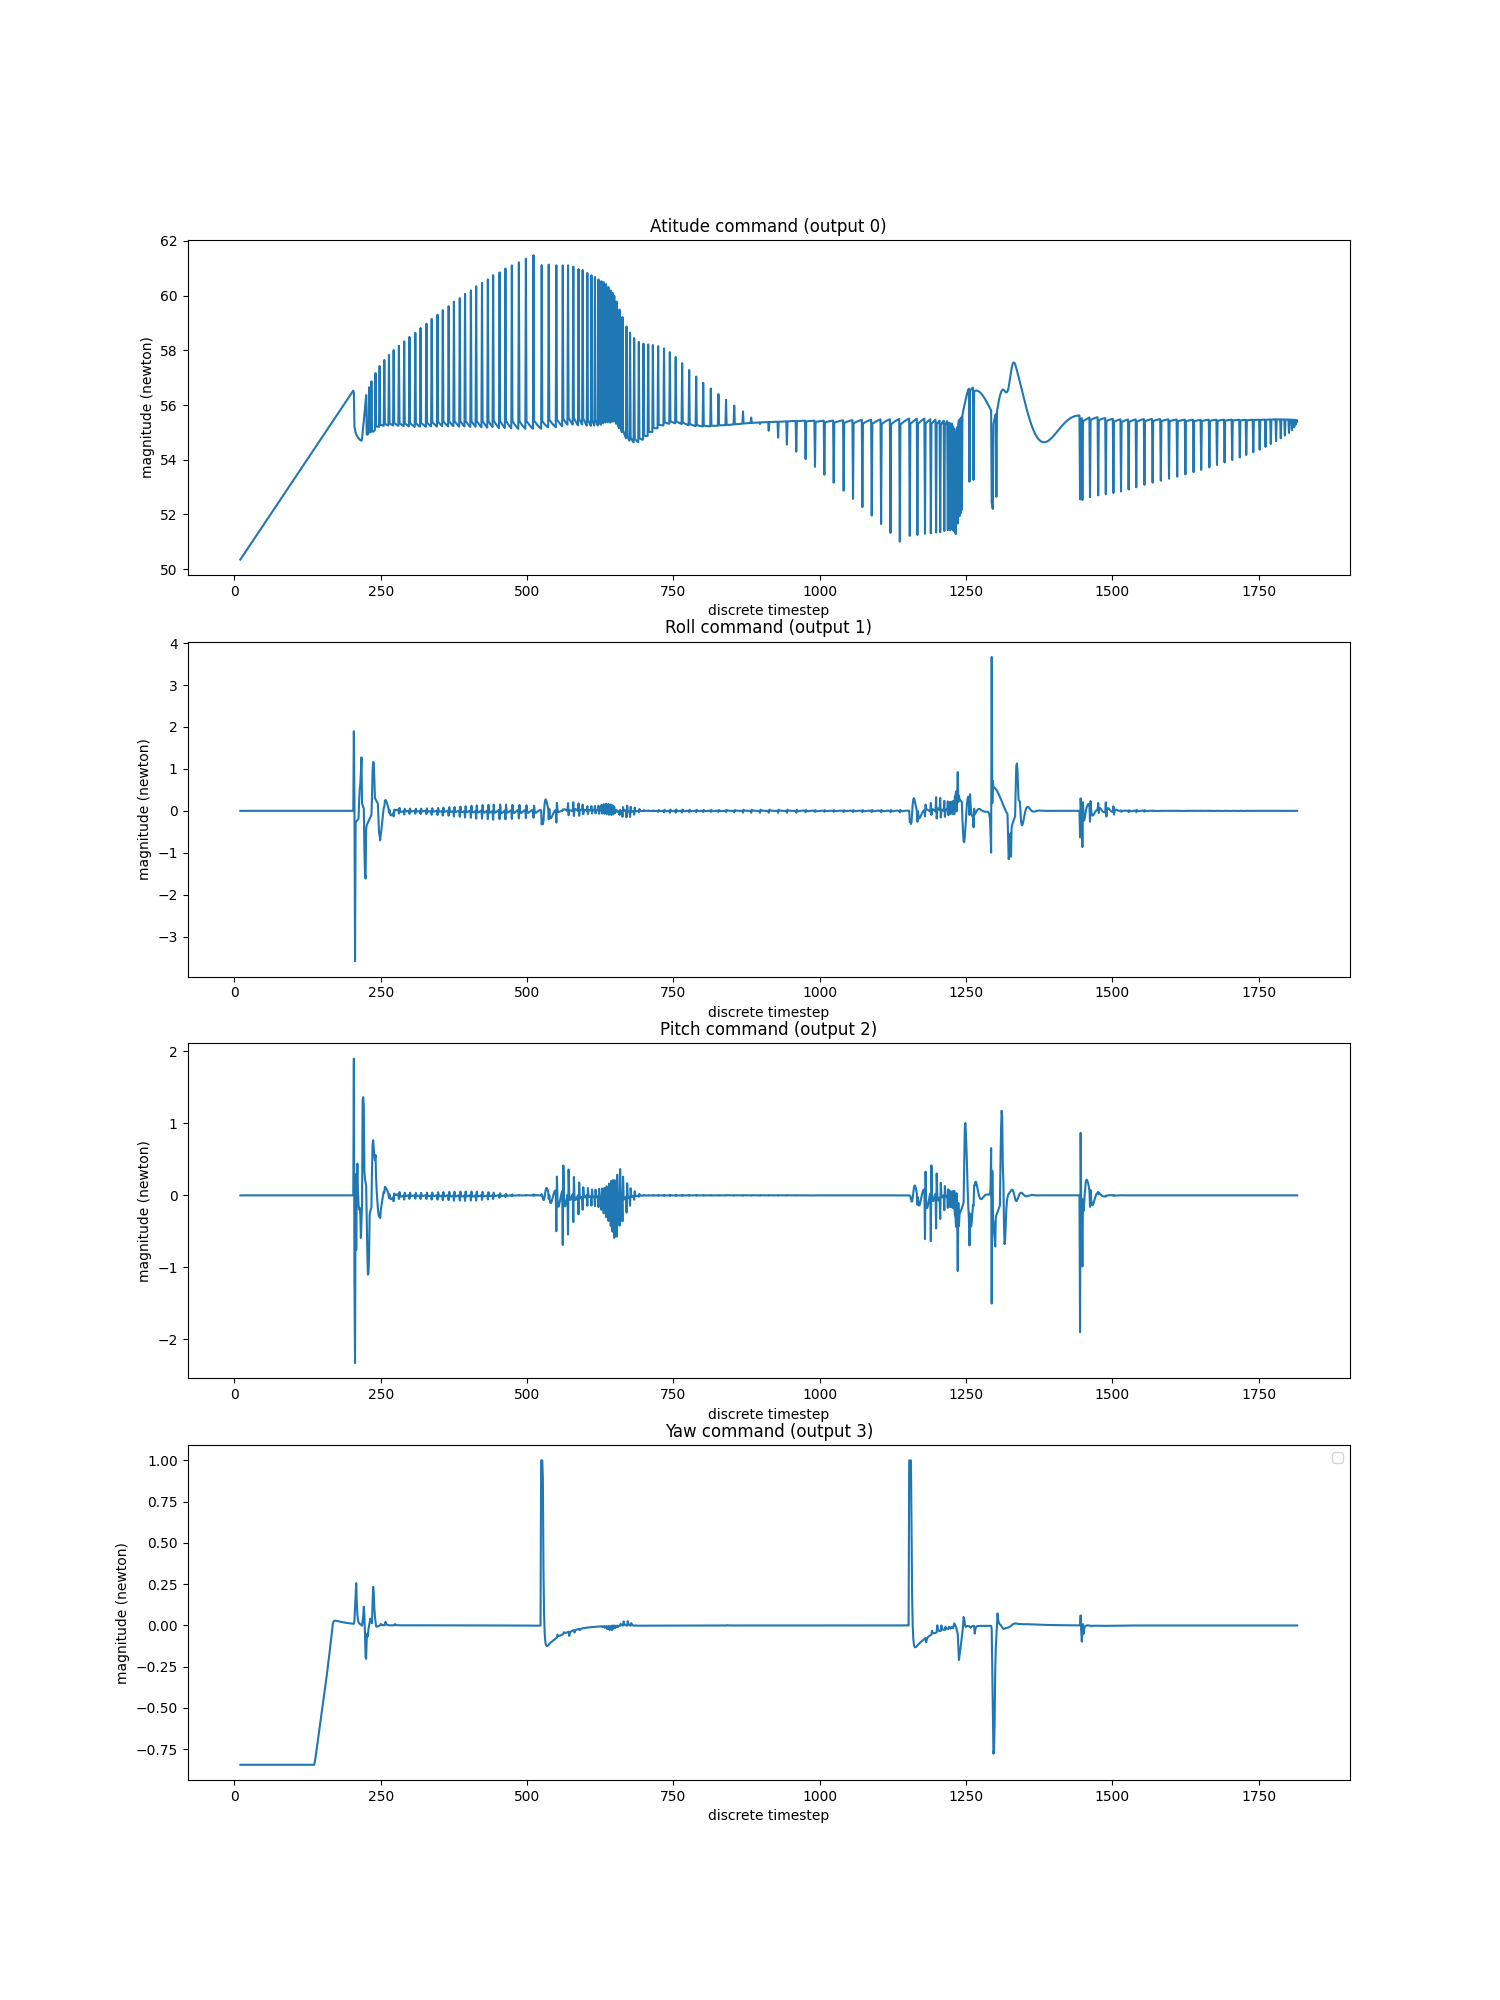

In [5]:
plt.rcParams['figure.figsize'] = 15,20
fig, axs = plt.subplots(4)
min_scope, max_scope = 10, 10000

# min_scope, max_scope = 500, 700

axs[0].plot(df['alt_command'][min_scope:max_scope])
axs[0].set_title("Atitude command (output 0)")
axs[0].set_xlabel('discrete timestep')
axs[0].set_ylabel('magnitude (newton)')

axs[1].plot(df['roll_command'][min_scope:max_scope])
axs[1].set_title("Roll command (output 1)")
axs[1].set_xlabel('discrete timestep')
axs[1].set_ylabel('magnitude (newton)')

axs[2].plot(df['pitch_command'][min_scope:max_scope])
axs[2].set_title("Pitch command (output 2)")
axs[2].set_xlabel('discrete timestep')
axs[2].set_ylabel('magnitude (newton)')

axs[3].plot(df['yaw_command'][min_scope:max_scope])
axs[3].set_title("Yaw command (output 3)")
axs[3].set_xlabel('discrete timestep')
axs[3].set_ylabel('magnitude (newton)')

plt.legend()
plt.show()